## ANALYSIS OF COVID-19 CASES BETWEEN FEBRUARY AND JULY 2020

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default
from datetime import datetime, date, time

### PROBLEM STATEMENT

The novelty of the deadly COVID-19, and the ensuing global pandemic cum lockdown implies that there is a need to keep track of how it affects people all over the world. One way of achieving this is via the use of data and visualisation to gain insights. This project focuses on analysing the cases of COVID-19 as recorded by the World Health Organisation (WHO).

#### Dataset Information:
        Three different datasets were used for this project. The first is "Covid.csv" with 17
        fields and 209 entries. The fields are defined as follow:
        
        Country/Region - Name of country and/or region
        Continent - Continent the country falls in
        Population - Total population of the country/region
        TotalCases - Total number of COVID-19 cases recorded
        NewCases - Total number of new COVID-19 cases recorded
        TotalDeaths - Total number of COVID-19 related deaths recorded
        NewDeaths - Total number of new COVID-19 related deaths
        TotalRecovered - Total number of people who recovered from the virus
        NewRecovered - New total number of people who recovered
        ActiveCases - Number of people currently having the virus
        Serious,Critical - Number of critical cases
        Tot Cases/1M pop - Total number of cases recorded per 1 million people
        Deaths/1M pop - Total number of deaths recorded per 1 million people
        TotalTests - Total number of tests recorded
        Tests/1M pop - Total number of tests recorded per 1 million people
        WHO Region - WHO Region the country/region belongs to
        iso_alpha - The ISO alphabetical abbreviation of the country, i.e. country code

In [86]:
Data = pd.read_csv('covid.csv')

In [87]:
Data.shape

(209, 17)

In [88]:
Data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region', 'iso_alpha'],
      dtype='object')

In [89]:
Data.head()

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region iso_alpha  
0      190640.0        Americas       USA  
1       62085.0        Americas       BRA  
2       16035.0  South-EastAsia       IND  
3      203623.0          Europe       RUS  
4       53044.0          Africa       ZAF

In [90]:
#Identifying countries/regions in the Western Pacific WHO region
Data[Data['WHO Region'] == 'WesternPacific']

Country/Region          Continent   Population  TotalCases  NewCases  \
21        Philippines               Asia  109722719.0      119460       NaN   
41          Singapore               Asia    5854932.0       54555       NaN   
48              Japan               Asia  126435859.0       42263       NaN   
67          Australia  Australia/Oceania   25528864.0       19890       NaN   
72           S. Korea               Asia   51273732.0       14519      20.0   
83           Malaysia               Asia   32406372.0        9038       NaN   
107         Hong Kong               Asia    7503041.0        3850       NaN   
133       New Zealand  Australia/Oceania    5002100.0        1569       NaN   
154           Vietnam               Asia   97425470.0         747       NaN   
162            Taiwan               Asia   23821199.0         477       NaN   
168          Mongolia               Asia    3283344.0         293       NaN   
174          Cambodia               Asia   16741375.0         243       NaN   
178  Papua New Guinea  Australia/Oceania    8963009.0         163       NaN   
195              Fiji  Australia/Oceania     897095.0          27       NaN   
200              Laos               Asia    7285750.0          20       NaN   

     TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
21        2150.0        NaN         66837.0           NaN      50473.0   
41          27.0        NaN         48031.0           NaN       6497.0   
48        1026.0        NaN         28877.0           NaN      12360.0   
67         255.0        NaN         10941.0           NaN       8694.0   
72         303.0        1.0         13543.0          42.0        673.0   
83         125.0        NaN          8713.0           NaN        200.0   
107         46.0        NaN          2458.0           NaN       1346.0   
133         22.0        NaN          1524.0           NaN         23.0   
154         10.0        NaN           392.0           NaN        345.0   
162          7.0        NaN           443.0           NaN         27.0   
168          NaN        NaN           260.0           NaN         33.0   
174          NaN        NaN           210.0           NaN         33.0   
178          3.0        NaN            53.0           NaN        107.0   
195          1.0        NaN            18.0           NaN          8.0   
200          NaN        NaN            19.0           NaN          1.0   

     Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
21              239.0            1089.0           20.0   1669996.0   
41                NaN            9318.0            5.0   1474372.0   
48              115.0             334.0            8.0    938739.0   
67               52.0             779.0           10.0   4631419.0   
72               18.0             283.0            6.0   1613652.0   
83                2.0             279.0            4.0    991333.0   
107              39.0             513.0            6.0    692430.0   
133               NaN             314.0            4.0    486943.0   
154               NaN               8.0            0.1    482456.0   
162               NaN              20.0            0.3     82737.0   
168               1.0              89.0            NaN     38334.0   
174               1.0              15.0            NaN     67807.0   
178               NaN              18.0            0.3     10808.0   
195               NaN              30.0            1.0      6693.0   
200               NaN               3.0            NaN     29374.0   

     Tests/1M pop      WHO Region iso_alpha  
21        15220.0  WesternPacific       PHL  
41       251817.0  WesternPacific       SGP  
48         7425.0  WesternPacific       JPN  
67       181419.0  WesternPacific       AUS  
72        31471.0  WesternPacific            
83        30591.0  WesternPacific       MYS  
107       92287.0  WesternPacific       HKG  
133       97348.0  WesternPacific       NZL  
154        4952.0  Wes

In [91]:
#Identifying fields having null values for certain entries
Data.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
iso_alpha             0
dtype: int64

With all entries having NaN values, the NewCases, NewDeaths, 
and NewRecovered columns are dropped entirely for this analysis as they are of no importance.

In [92]:
Data.drop('NewCases', axis=1, inplace=True)

In [93]:
Data.drop('NewDeaths', axis=1, inplace=True)

In [94]:
Data.drop('NewRecovered', axis=1, inplace=True)

In [95]:
#Viewing our dataset again shows that the 3 fields have been dropped completely
Data

Country/Region      Continent    Population  TotalCases  \
0                      USA  North America  3.311981e+08     5032179   
1                   Brazil  South America  2.127107e+08     2917562   
2                    India           Asia  1.381345e+09     2025409   
3                   Russia         Europe  1.459409e+08      871894   
4             South Africa         Africa  5.938157e+07      538184   
..                     ...            ...           ...         ...   
204             Montserrat  North America  4.992000e+03          13   
205  Caribbean Netherlands  North America  2.624700e+04          13   
206       Falkland Islands  South America  3.489000e+03          13   
207           Vatican City         Europe  8.010000e+02          12   
208         Western Sahara         Africa  5.986820e+05          10   

     TotalDeaths  TotalRecovered  ActiveCases  Serious,Critical  \
0       162804.0       2576668.0    2292707.0           18296.0   
1        98644.0       2047660.0     771258.0            8318.0   
2        41638.0       1377384.0     606387.0            8944.0   
3        14606.0        676357.0     180931.0            2300.0   
4         9604.0        387316.0     141264.0             539.0   
..           ...             ...          ...               ...   
204          1.0            10.0          2.0               NaN   
205          NaN             7.0          6.0               NaN   
206          NaN            13.0          0.0               NaN   
207          NaN            12.0          0.0               NaN   
208          1.0             8.0          1.0               NaN   

     Tot Cases/1M pop  Deaths/1M pop  TotalTests  Tests/1M pop  \
0             15194.0          492.0  63139605.0      190640.0   
1             13716.0          464.0  13206188.0       62085.0   
2              1466.0           30.0  22149351.0       16035.0   
3              5974.0          100.0  29716907.0      203623.0   
4              9063.0          162.0   3149807.0       53044.0   
..                ...            ...         ...           ...   
204            2604.0          200.0        61.0       12220.0   
205             495.0            NaN       424.0       16154.0   
206            3726.0            NaN      1816.0      520493.0   
207           14981.0            NaN         NaN           NaN   
208              17.0            2.0         NaN           NaN   

         WHO Region iso_alpha  
0          Americas       USA  
1          Americas       BRA  
2    South-EastAsia       IND  
3            Europe       RUS  
4            Africa       ZAF  
..              ...       ...  
204             NaN       MSR  
205             NaN            
206             NaN       FLK  
207          Europe       VAT  
208          Africa       ESH  

[209 rows x 14 columns]

In [96]:
Data['WHO Region'].unique()

array(['Americas', 'South-EastAsia', 'Europe', 'Africa',
       'EasternMediterranean', 'WesternPacific', nan], dtype=object)

In [97]:
#Replacing NaN values for TotalDeaths column
Data['TotalDeaths'].fillna(method='ffill', inplace = True)

In [98]:
#The NaN entries have been filled with values of the entry in rows before each
Data['TotalDeaths']

0      162804.0
1       98644.0
2       41638.0
3       14606.0
4        9604.0
         ...   
204         1.0
205         1.0
206         1.0
207         1.0
208         1.0
Name: TotalDeaths, Length: 209, dtype: float64

In [99]:
Data.describe

<bound method NDFrame.describe of             Country/Region      Continent    Population  TotalCases  \
0                      USA  North America  3.311981e+08     5032179   
1                   Brazil  South America  2.127107e+08     2917562   
2                    India           Asia  1.381345e+09     2025409   
3                   Russia         Europe  1.459409e+08      871894   
4             South Africa         Africa  5.938157e+07      538184   
..                     ...            ...           ...         ...   
204             Montserrat  North America  4.992000e+03          13   
205  Caribbean Netherlands  North America  2.624700e+04          13   
206       Falkland Islands  South America  3.489000e+03          13   
207           Vatican City         Europe  8.010000e+02          12   
208         Western Sahara         Africa  5.986820e+05          10   

     TotalDeaths  TotalRecovered  ActiveCases  Serious,Critical  \
0       162804.0       2576668.0    2292707.0 

In [100]:
Data['Serious,Critical'].fillna(method = 'ffill', inplace = True)

In [101]:
#for row in Data.itertuples():
#    if row[2] == 'North America' :
#        row[13] == 'Americas'
#    print(row[13])

In [102]:
#Replacing WHO Region with appropriate values
Data['WHO Region'].loc[Data['Continent'] == 'North America'] = 'Americas'
Data['WHO Region'].loc[Data['Continent'] == 'South America'] = 'Americas'
Data['WHO Region'].loc[Data['Continent'] == 'Africa'] = 'Africa'
Data['WHO Region'].loc[Data['Continent'] == 'Europe'] = 'Europe'
Data['WHO Region'].loc[Data['Continent'] == 'Asia'] = 'Asia'
Data['WHO Region'].loc[Data['Continent'] == 'Australia/Oceania'] = 'Australia/Oceania'

c:\users\teedaniels\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [103]:
Data

Country/Region      Continent    Population  TotalCases  \
0                      USA  North America  3.311981e+08     5032179   
1                   Brazil  South America  2.127107e+08     2917562   
2                    India           Asia  1.381345e+09     2025409   
3                   Russia         Europe  1.459409e+08      871894   
4             South Africa         Africa  5.938157e+07      538184   
..                     ...            ...           ...         ...   
204             Montserrat  North America  4.992000e+03          13   
205  Caribbean Netherlands  North America  2.624700e+04          13   
206       Falkland Islands  South America  3.489000e+03          13   
207           Vatican City         Europe  8.010000e+02          12   
208         Western Sahara         Africa  5.986820e+05          10   

     TotalDeaths  TotalRecovered  ActiveCases  Serious,Critical  \
0       162804.0       2576668.0    2292707.0           18296.0   
1        98644.0       2047660.0     771258.0            8318.0   
2        41638.0       1377384.0     606387.0            8944.0   
3        14606.0        676357.0     180931.0            2300.0   
4         9604.0        387316.0     141264.0             539.0   
..           ...             ...          ...               ...   
204          1.0            10.0          2.0               1.0   
205          1.0             7.0          6.0               1.0   
206          1.0            13.0          0.0               1.0   
207          1.0            12.0          0.0               1.0   
208          1.0             8.0          1.0               1.0   

     Tot Cases/1M pop  Deaths/1M pop  TotalTests  Tests/1M pop WHO Region  \
0             15194.0          492.0  63139605.0      190640.0   Americas   
1             13716.0          464.0  13206188.0       62085.0   Americas   
2              1466.0           30.0  22149351.0       16035.0       Asia   
3              5974.0          100.0  29716907.0      203623.0     Europe   
4              9063.0          162.0   3149807.0       53044.0     Africa   
..                ...            ...         ...           ...        ...   
204            2604.0          200.0        61.0       12220.0   Americas   
205             495.0            NaN       424.0       16154.0   Americas   
206            3726.0            NaN      1816.0      520493.0   Americas   
207           14981.0            NaN         NaN           NaN     Europe   
208              17.0            2.0         NaN           NaN     Africa   

    iso_alpha  
0         USA  
1         BRA  
2         IND  
3         RUS  
4         ZAF  
..        ...  
204       MSR  
205            
206       FLK  
207       VAT  
208       ESH  

[209 rows x 14 columns]

In [104]:
#Replacing NaN entries of the Deaths/1M pop column with the mean value of the column
data_deaths = round(Data['Deaths/1M pop'].mean())
data_deaths

99

In [105]:
Data['Deaths/1M pop'].fillna(value = data_deaths, inplace = True)

In [106]:
#Identifying row entry without value for the WHO Region column; the row was dropped afterwards
#as we could not ascertain it's specific WHO Region.
Data[Data['Continent'].isna()]

Country/Region Continent  Population  TotalCases  TotalDeaths  \
156  Diamond Princess       NaN         NaN         712         13.0   

     TotalRecovered  ActiveCases  Serious,Critical  Tot Cases/1M pop  \
156           651.0         48.0               4.0               NaN   

     Deaths/1M pop  TotalTests  Tests/1M pop WHO Region iso_alpha  
156           99.0         NaN           NaN        NaN

In [107]:
Data.drop([156], inplace = True)

In [108]:
#Making sure the row was dropped without affecting others
Data.loc[154:160]

Country/Region      Continent  Population  TotalCases  TotalDeaths  \
154          Vietnam           Asia  97425470.0         747         10.0   
155          Lesotho         Africa   2143943.0         742         23.0   
157       San Marino         Europe     33938.0         699         42.0   
158          Réunion         Africa    895952.0         671          5.0   
159  Channel Islands         Europe    174022.0         597         47.0   
160           Guyana  South America    786936.0         538         22.0   

     TotalRecovered  ActiveCases  Serious,Critical  Tot Cases/1M pop  \
154           392.0        345.0               1.0               8.0   
155           175.0        544.0               1.0             346.0   
157           657.0          0.0               4.0           20596.0   
158           592.0         74.0               3.0             749.0   
159           533.0         17.0               3.0            3431.0   
160           189.0        327.0               2.0             684.0   

     Deaths/1M pop  TotalTests  Tests/1M pop WHO Region iso_alpha  
154            0.1    482456.0        4952.0       Asia       VNM  
155           11.0      8771.0        4091.0     Africa       LSO  
157         1238.0      6068.0      178797.0     Europe       SMR  
158            6.0     35419.0       39532.0     Africa       REU  
159          270.0     30721.0      176535.0     Europe            
160           28.0      5165.0        6563.0   Americas       GUY

In [109]:
#Replacing NaN entries for other numerical columns using the mean() function
Data[Data['TotalRecovered'].isna()]

Country/Region Continent  Population  TotalCases  TotalDeaths  \
9           Spain    Europe  46756648.0      354530      28500.0   
11             UK    Europe  67922029.0      308134      46413.0   
29         Sweden    Europe  10105596.0       81967       5766.0   
40    Netherlands    Europe  17138756.0       56982       6153.0   

    TotalRecovered  ActiveCases  Serious,Critical  Tot Cases/1M pop  \
9              NaN          NaN             617.0            7582.0   
11             NaN          NaN              73.0            4537.0   
29             NaN          NaN              38.0            8111.0   
40             NaN          NaN              37.0            3325.0   

    Deaths/1M pop  TotalTests  Tests/1M pop WHO Region iso_alpha  
9           610.0   7064329.0      151087.0     Europe       ESP  
11          683.0  17515234.0      257873.0     Europe       UKR  
29          571.0    863315.0       85429.0     Europe       SWE  
40          359.0   1079860.0       63007.0     Europe       NLD

In [110]:
Data['TotalRecovered'].fillna(value = round(Data['TotalRecovered'].mean()), inplace = True)

In [111]:
Data['ActiveCases'].fillna(value = round(Data['ActiveCases'].mean()), inplace = True)

In [112]:
Data['TotalTests'].fillna(value = round(Data['TotalTests'].mean()), inplace = True)

In [113]:
Data['Tests/1M pop'].fillna(value = round(Data['Tests/1M pop'].mean()), inplace = True)

In [114]:
#Making sure there are no columns with NaN values
Data.isnull().sum()

Country/Region      0
Continent           0
Population          0
TotalCases          0
TotalDeaths         0
TotalRecovered      0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
WHO Region          0
iso_alpha           0
dtype: int64

In [115]:
#Previewing our cleaned dataset
Data.head()

Country/Region      Continent    Population  TotalCases  TotalDeaths  \
0            USA  North America  3.311981e+08     5032179     162804.0   
1         Brazil  South America  2.127107e+08     2917562      98644.0   
2          India           Asia  1.381345e+09     2025409      41638.0   
3         Russia         Europe  1.459409e+08      871894      14606.0   
4   South Africa         Africa  5.938157e+07      538184       9604.0   

   TotalRecovered  ActiveCases  Serious,Critical  Tot Cases/1M pop  \
0       2576668.0    2292707.0           18296.0           15194.0   
1       2047660.0     771258.0            8318.0           13716.0   
2       1377384.0     606387.0            8944.0            1466.0   
3        676357.0     180931.0            2300.0            5974.0   
4        387316.0     141264.0             539.0            9063.0   

   Deaths/1M pop  TotalTests  Tests/1M pop WHO Region iso_alpha  
0          492.0  63139605.0      190640.0   Americas       USA  
1          464.0  13206188.0       62085.0   Americas       BRA  
2           30.0  22149351.0       16035.0       Asia       IND  
3          100.0  29716907.0      203623.0     Europe       RUS  
4          162.0   3149807.0       53044.0     Africa       ZAF

### VISUALISATION OF COVID-19 ACROSS CONTINENTS

#### The first phase of visualisation involves continent-wise analysis 

Visualisation of Total Cases per WHO Region

In [118]:
figure = px.bar(Data, x = 'WHO Region', y = 'TotalCases', 
       height = 500, color = 'TotalCases', color_continuous_scale='viridis_r',
       hover_data = ['Country/Region','Continent','Population','TotalCases', 'ActiveCases'])
figure.update_layout(
    title = {
        'text': "Distribution of COVID-19 Cases Recorded per WHO Region",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

The figure above describes the total number of cases recorded per WHO Region. On hover, one can see the statistical data for the number of cases per country in each region, the population of each country, the continent they belong to, number of active COVID-19 cases and the name of each country.

It is evident from above that the Americas have the highest number of cases (10452852), a figure that is about 16% more than the number of cases recorded in other WHO Regions combined (1736538).

In [119]:
figure = px.scatter(Data, x = 'WHO Region', y = 'TotalRecovered', 
       height = 400, size = 'TotalRecovered', size_max = 70,
           color = 'WHO Region', hover_data = ['Continent'])
figure.update_layout(
    title = {
        'text': "Number of Recoveries per Continent",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

In [704]:
figure = px.scatter(Data.head(5), x = 'Country/Region', y = 'ActiveCases',
           size = 'ActiveCases', size_max = 80,
       height = 400, color = 'ActiveCases', hover_data = ['Country/Region','Continent'],
      title = 'Active COVID19 Cases in relation to Total Number of Cases - Top 20')
figure.update_layout(
    title = {
        'text': "Number of Recoveries per Continent",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

In [703]:
figure = px.bar(Data, x = 'WHO Region', y = 'TotalRecovered', height = 500, 
       color = 'TotalRecovered', hover_data = ['TotalRecovered'],
        title = 'Number of Recoveries per Continent')
figure.update_layout(
    title = {
        'text': "Number of Recoveries per Continent",
        'y':0.83,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

Visualisation for Countries/Regions

In [700]:
figure = px.scatter(Data.head(20), x = 'TotalCases', y = 'TotalDeaths', 
       height = 450, color = 'TotalDeaths', size = 'TotalDeaths',
       hover_data = ['Country/Region','Continent'], size_max = 80,
           log_x = True, log_y = True,
      title = 'Comparison of COVID-19 Cases and Deaths Recorded per Country/Region - Top 20')
figure.update_layout(
    title = {
        'text': "Number of Recoveries per Continent",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

In [699]:
figure = px.scatter(Data.head(20), x = 'TotalDeaths', y = 'TotalTests', 
       height = 450, color = 'TotalDeaths', size = 'TotalDeaths',
       size_max = 80, hover_data = ['Country/Region','Continent'],
      title = 'Total Number of COVID-19 Tests Administered vs Total Number of Deaths Recorded')
figure.update_layout(
    title = {
        'text': "Number of Recoveries per Continent",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

In [698]:
figure = px.scatter(Data, x = 'TotalCases', y = 'TotalRecovered', 
       height = 450, size = 'TotalCases', size_max = 80,
           color = 'TotalRecovered', hover_data = ['Continent'],
          title = 'Total Number of Cases Recorded vs COVID-19 Tests Recovery Rate')
figure.update_layout(
    title = {
        'text': "Number of Recoveries per Continent",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

In [696]:
figure = px.scatter(Data.head(10), x = 'Country/Region', y = 'ActiveCases',
           size = 'ActiveCases', size_max = 80,
       height = 400, color = 'ActiveCases', hover_data = ['Country/Region','Continent'],
      title = 'Active COVID19 Cases in relation to Total Number of Cases - Top 20')
figure.update_layout(
    title = {
        'text': "Number of Recoveries per Continent",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

### AFRICA COVID-19 VISUALISATION

In [32]:
Africa = Data[Data['WHO Region'] == 'Africa']

In [33]:
Africa.head()

Country/Region Continent   Population  TotalCases  TotalDeaths  \
4    South Africa    Africa   59381566.0      538184       9604.0   
26          Egypt    Africa  102516525.0       95006       4951.0   
45        Nigeria    Africa  206606300.0       45244        930.0   
50          Ghana    Africa   31133483.0       39642        199.0   
54        Algeria    Africa   43926079.0       33626       1273.0   

    TotalRecovered  ActiveCases  Serious,Critical  Tot Cases/1M pop  \
4         387316.0     141264.0             539.0            9063.0   
26         48898.0      41157.0              41.0             927.0   
45         32430.0      11884.0               7.0             219.0   
50         36384.0       3059.0               7.0            1273.0   
54         23238.0       9115.0              57.0             766.0   

    Deaths/1M pop  TotalTests  Tests/1M pop WHO Region iso_alpha  
4           162.0   3149807.0       53044.0     Africa       ZAF  
26           48.0    135000.0        1317.0     Africa       EGY  
45            5.0    306894.0        1485.0     Africa       NGA  
50            6.0    405817.0       13035.0     Africa       GHA  
54           29.0   1402405.0       83959.0     Africa       DZA

In [711]:
figure = px.scatter(Africa.head(20), x = 'TotalRecovered', y = 'TotalCases', color = 'TotalCases', height = 500, 
        size = 'TotalCases', size_max = 80, log_x = True, log_y = True, hover_data = ['Country/Region'])
figure.update_layout(
    title = {
        'text': "Number of Recoveries per Country",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
     #font=dict(family="Arial", size=12, color="RebeccaPurple" """))

In [4]:
Date_Specific = pd.read_csv(r"C:\Users\teedaniels\Downloads\Big Data Tracks\Data Analysis\Covid-19 Analysis\covid_grouped.csv")

In [5]:
Date_Specific

Date      Country/Region  Confirmed  Deaths  Recovered  Active  \
0      2020-01-22         Afghanistan          0       0          0       0   
1      2020-01-22             Albania          0       0          0       0   
2      2020-01-22             Algeria          0       0          0       0   
3      2020-01-22             Andorra          0       0          0       0   
4      2020-01-22              Angola          0       0          0       0   
...           ...                 ...        ...     ...        ...     ...   
35151  2020-07-27  West Bank and Gaza      10621      78       3752    6791   
35152  2020-07-27      Western Sahara         10       1          8       1   
35153  2020-07-27               Yemen       1691     483        833     375   
35154  2020-07-27              Zambia       4552     140       2815    1597   
35155  2020-07-27            Zimbabwe       2704      36        542    2126   

       New cases  New deaths  New recovered             WHO Region iso_alpha  
0              0           0              0  Eastern Mediterranean       AFG  
1              0           0              0                 Europe       ALB  
2              0           0              0                 Africa       DZA  
3              0           0              0                 Europe       AND  
4              0           0              0                 Africa       AGO  
...          ...         ...            ...                    ...       ...  
35151        152           2              0  Eastern Mediterranean            
35152          0           0              0                 Africa       ESH  
35153         10           4             36  Eastern Mediterranean       YEM  
35154         71           1            465                 Africa       ZMB  
35155        192           2             24                 Africa       ZWE  

[35156 rows x 11 columns]

In [24]:
figure = px.bar(Date_Specific, x = 'Date', y = 'Deaths', height = 500,
               color_continuous_scale= 'viridis_r')
figure.update_layout(
    title = {
        'text': "Total Number of COVID-19 Deaths in Nigeria between February and July 2020",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

In [11]:
Nigeria = Date_Specific[Date_Specific['Country/Region'] == 'Nigeria']

In [12]:
Nigeria

Date Country/Region  Confirmed  Deaths  Recovered  Active  \
124    2020-01-22        Nigeria          0       0          0       0   
311    2020-01-23        Nigeria          0       0          0       0   
498    2020-01-24        Nigeria          0       0          0       0   
685    2020-01-25        Nigeria          0       0          0       0   
872    2020-01-26        Nigeria          0       0          0       0   
...           ...            ...        ...     ...        ...     ...   
34345  2020-07-23        Nigeria      38948     833      16061   22054   
34532  2020-07-24        Nigeria      39539     845      16559   22135   
34719  2020-07-25        Nigeria      39977     856      16948   22173   
34906  2020-07-26        Nigeria      40532     858      17374   22300   
35093  2020-07-27        Nigeria      41180     860      18203   22117   

       New cases  New deaths  New recovered WHO Region iso_alpha  
124            0           0              0     Africa       NGA  
311            0           0              0     Africa       NGA  
498            0           0              0     Africa       NGA  
685            0           0              0     Africa       NGA  
872            0           0              0     Africa       NGA  
...          ...         ...            ...        ...       ...  
34345        604          20            246     Africa       NGA  
34532        591          12            498     Africa       NGA  
34719        438          11            389     Africa       NGA  
34906        555           2            426     Africa       NGA  
35093        648           2            829     Africa       NGA  

[188 rows x 11 columns]

In [13]:
figure = px.bar(Nigeria, x = 'Date', y = 'Deaths', color = 'Deaths', height = 500,
               color_continuous_scale= 'viridis_r')
figure.update_layout(
    title = {
        'text': "Total Number of COVID-19 Deaths in Nigeria between February and July 2020",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

In [43]:
figure = px.scatter(Nigeria, x = 'Date', y = 'Deaths', color = 'Deaths', height = 500,
               color_continuous_scale= 'viridis_r', animation_group = 'Date')
figure.update_layout(
    title = {
        'text': "Total Number of COVID-19 Deaths in Nigeria between February and July 2020",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

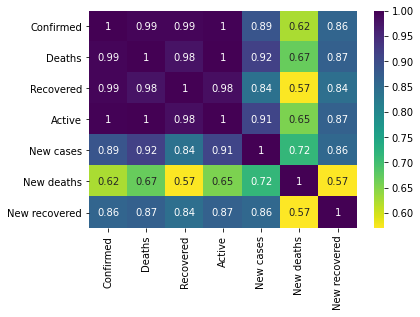

In [75]:
figure, ax = plt.subplots(figsize=(10,10)) 
figure = sns.heatmap(Nigeria.corr(method='pearson'), annot = True, cmap = 'viridis_r')

In [50]:
px.choropleth(Date_Specific, locations = 'iso_alpha', color = 'Deaths', 
             color_continuous_scale = 'portland', projection = 'natural earth',
             animation_frame = 'Date')